## **ECOM90025 ADA Tutorial 11** ##

In [ ]:
# library packages
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LassoCV, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.decomposition import PCA, LatentDirichletAllocation
import plotly.subplots as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import patsy
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

import requests
from PIL import Image
from io import BytesIO

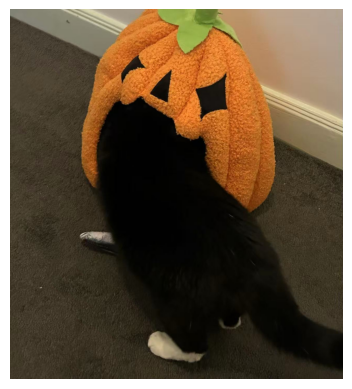

In [ ]:
# Happy early Halloween - Apparently pumpkins do eat cats
# https://drive.google.com/file/d/1p69ppHBvkTKUsK4ZXYQFtDmRlRVuWqMD/view?usp=drive_link
url = 'https://drive.google.com/uc?id=1p69ppHBvkTKUsK4ZXYQFtDmRlRVuWqMD'

# Download and open the image
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# my state this week with 2 mid exams
# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

###**The Titanic Data AGAIN !**

In [ ]:
# read in the train set
df_train = pd.read_csv("https://www.dropbox.com/s/i0kduxato6oxwyg/train.csv?dl=1")

# read in the test set
df_test = pd.read_csv("https://www.dropbox.com/scl/fi/b9etzcpfxyoe52o0mmtn5/test.csv?rlkey=qrdc62mqi9wwtiqkj7zp40qm5&dl=1")

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Let's do the same thing we did with the missing variables
# Do the train set first
# deal with missing variable for age
X_train = df_train[['Age']].copy()
X_train['missing_Age'] = X_train['Age'].isnull().astype(int)
age_median = X_train['Age'].median()
X_train['Age'] = X_train['Age'].fillna(age_median)

# Create dummy variables for Sex and add to X
sex_dummies = pd.get_dummies(df_train['Sex'], prefix='Sex')
X_train = pd.concat([X_train, sex_dummies], axis=1)

print(X_train.info())
print(X_train.head())
print(X_train.columns)

# set y variable for train set
y_train = df_train['Survived']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   missing_Age  891 non-null    int64  
 2   Sex_female   891 non-null    bool   
 3   Sex_male     891 non-null    bool   
dtypes: bool(2), float64(1), int64(1)
memory usage: 15.8 KB
None
    Age  missing_Age  Sex_female  Sex_male
0  22.0            0       False      True
1  38.0            0        True     False
2  26.0            0        True     False
3  35.0            0        True     False
4  35.0            0       False      True
Index(['Age', 'missing_Age', 'Sex_female', 'Sex_male'], dtype='object')


In [ ]:
# Then we do the same for the test set
# Start with Age column
X_test = df_test[['Age']].copy()
X_test['missing_Age'] = X_test['Age'].isnull().astype(int)
X_test['Age'] = X_test['Age'].fillna(age_median)
# Create dummy variables for Sex and add to X
sex_dummies = pd.get_dummies(df_test['Sex'], prefix='Sex')
X_test = pd.concat([X_test, sex_dummies], axis=1)

print(X_test.info())
print(X_test.head())
print(X_test.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    float64
 1   missing_Age  418 non-null    int64  
 2   Sex_female   418 non-null    bool   
 3   Sex_male     418 non-null    bool   
dtypes: bool(2), float64(1), int64(1)
memory usage: 7.5 KB
None
    Age  missing_Age  Sex_female  Sex_male
0  34.5            0       False      True
1  47.0            0        True     False
2  62.0            0       False      True
3  27.0            0       False      True
4  22.0            0        True     False
Index(['Age', 'missing_Age', 'Sex_female', 'Sex_male'], dtype='object')


###**ADA Boosting**


Algorithm
1. Initialisation, each obs has equal weight as $w_i=1/n$.
2. Train a weak learner $t$ (a stump: one root with only two leaves).
3. Find error $\epsilon_t = \sum_{i=1}^n w_i \textbf{1}(\text{wrong classification})$. Obviously, $\epsilon\in(0,1)$. We give a little margin if it is exactly equal to $0$ or $1$.
4. Find the weight of this weak learner $\alpha_t = \frac{1}{2}\ln\left(\frac{1-\epsilon_t}{\epsilon_t}\right)$. Small error had large weight, this is intuitive.
5. Now reweight the ovservations/data, so that the misclassified obs receive more weight and be taken care of for the next round. This is the idea of boosting. $w_i\leftarrow w_i \exp(\alpha_t)$ if $i$ is misclassified; and $w_i\leftarrow w_i \exp(-\alpha_t)$ if $i$ is correctly classified.
    - You must normalise the weight to sum up to $1$ (normalisation)
6. Repeat until many stumps are generated **sequentially**.
    - Because of various re-weighting, some stumps are good at a certain observations while others are good at something else. They are specialised.
7. At last, collect ALL weak learners and form decision in **parallel**!
    - Every stump has a vote! But each has its weight $\alpha_t$.
    - Add up all the weighted vote for category $1$
    - Add up all the weighted vote for category $0$
    - Make decision based on votes!

In [ ]:
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)
# note here this is a naive boosting cause it does not tune parameter but rather set the iteration = 200
bdt.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [ ]:
# Let's see in sample fitting first
# print out the prediction matrix
y_pred_in = bdt.predict(X_train)
ct = pd.crosstab(y_train, y_pred_in, rownames=['Actual'], colnames=['Predicted'])
print(ct)

Predicted    0    1
Actual             
0          468   81
1          104  238


In [ ]:
# Then let's see test sample fitting
y_pred_test = bdt.predict(X_test)
df_submission = pd.read_csv("https://www.dropbox.com/scl/fi/va0u9huh339kmy33qavbx/gender_submission.csv?rlkey=daj1ln7frarcruiwc0lymva34&dl=1")# type: ignore
df_submission['Survived'] = y_pred_test
df_submission.to_csv("submission_adaboost.csv", index=False)

# The Kaggle score is 0.7631
# which is not the best
# but also note that we did not tune anything. and we did not use all the information

###**Gradient Boosting**

#### **Goal**
We want to learn a prediction function  
$$
F(x) = \arg\min_F \sum_{i=1}^n L\big(y_i, F(x_i)\big)
$$
by **iteratively improving** an initial weak learner using the *functional gradient descent* idea.




#### **Step 1. Initialization**
Start with a constant model that minimizes the total loss:
$$
F_0(x) = \arg\min_c \sum_{i=1}^n L(y_i, c)
$$
For example, with MSE loss, $F_0(x) = \bar{y}$.


#### **Step 2. Compute the Negative Gradient (Pseudo-Residuals)**
At iteration $m=1,2,\dots,M$, compute the **negative gradient of the loss** with respect to the current predictions:
$$
r_i^{(m)} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F=F_{m-1}}
$$

This quantity tells us, for each observation, *how the loss would change* if we moved $F(x_i)$ up or down slightly.



#### **Step 3. Fit a Weak Learner to the Pseudo-Residuals**
Fit a new weak learner (usually a small regression tree) to predict these residuals:
$$
h_m(x) \approx r_i^{(m)}
$$
This step means:  
we find the direction **in function space** that is *closest* to the ideal negative gradient but *realizable* within our weak learner family.


#### **Step 4. Compute the Optimal Step Size**
Optionally perform a one-dimensional line search to find the best step size along $h_m(x)$:
$$
\gamma_m = \arg\min_{\gamma} \sum_{i=1}^n L\!\left(y_i,\; F_{m-1}(x_i) + \gamma\,h_m(x_i)\right)
$$


#### **Step 5. Update the Model**
Move the current model in the direction of the fitted weak learner:
$$
F_m(x) = F_{m-1}(x) + \eta\,\gamma_m\,h_m(x)
$$
where $\eta$ is a **learning rate** (shrinkage parameter, e.g. $0.01$–$0.1$).

This is equivalent to one **gradient-descent step** in function space.



#### **Step 6. Repeat Until Convergence or Early Stopping**
Repeat Steps 2–5 for $M$ iterations or until the validation loss stops improving.



#### **Step 7. Final Predictor**
After $M$ boosting rounds, the final model is
$$
F_M(x) = F_0(x) + \sum_{m=1}^M \eta\,\gamma_m\,h_m(x)
$$



#### **Intuition Recap**
- The **Taylor expansion** gives us the first-order approximation:
  $$
  \mathcal{L}(F + \epsilon h) \approx
  \mathcal{L}(F) + \epsilon \sum_i
  \frac{\partial L(y_i,F(x_i))}{\partial F(x_i)}\,h(x_i)
  $$
  The inner product term shows how much loss will change if we move in direction $h$.
- Choosing $h$ **aligned with the negative gradient** makes that term most negative → largest expected decrease in loss.
- Fitting $h_m$ to the negative gradient finds the *best feasible descent direction* inside our weak learner space.
- Updating $F_{m-1}$ by adding $\eta h_m$ corresponds to taking a **small step** toward the minimum.



In [ ]:
# fit your gradient boosting
gb_reg = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_reg.fit(X_train, y_train)

# let's see in sample first again
y_pred_in = gb_reg.predict(X_train)
ct2 = pd.crosstab(y_train, y_pred_in, rownames=['Actual'], colnames=['Predicted'])
print(ct2)

Predicted    0    1
Actual             
0          474   75
1           94  248


In [ ]:
# see test sample performance
y_pred = gb_reg.predict(X_test)
df_submission['Survived'] = y_pred
df_submission.to_csv("submission_gboost.csv", index=False)

# The Kaggle score is 0.7535
# same argument to consider

### **Light GBM**

Light GBM follows the general idea of Gradient Boosting, with only **two modifications**:
1. At each fit for the model (each tree you train), they do not use continuous split to develop leaves, but discrete bins

2. For each layer of new trainig, they don't train for all branches, but only the previous fit's leaf that has largest loss reduction

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

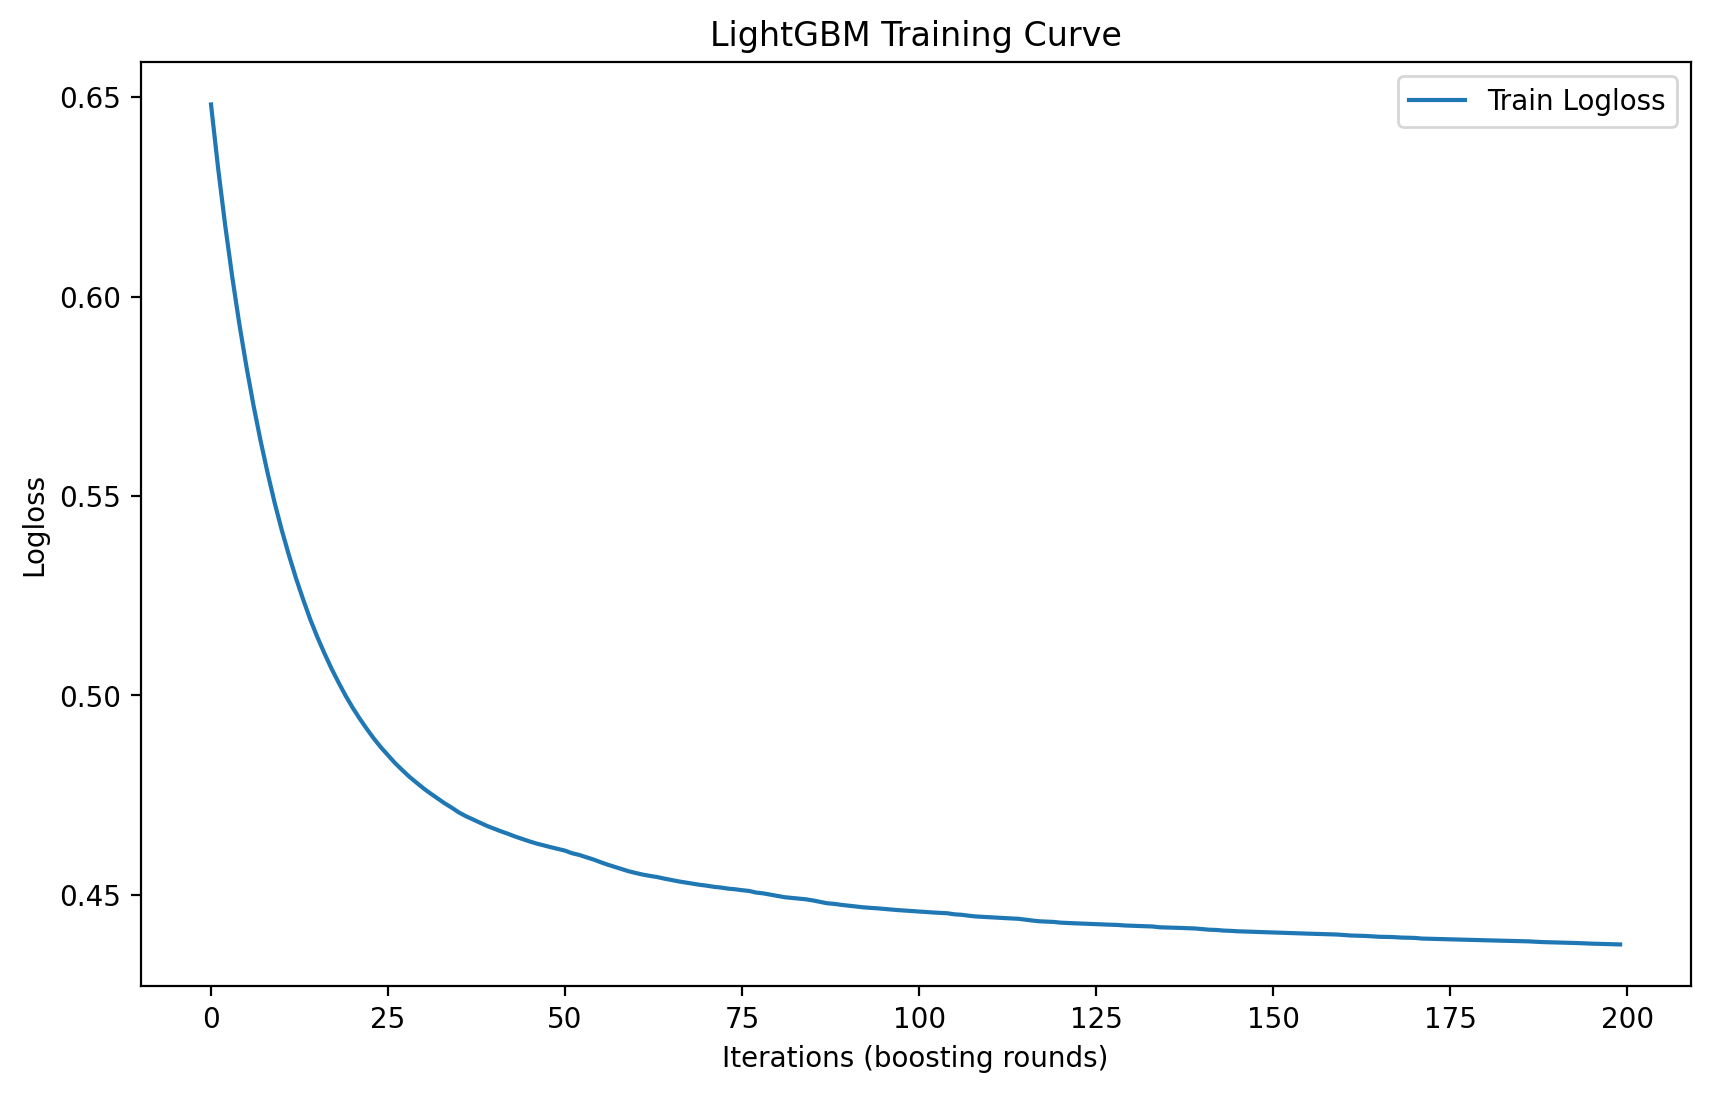

In [ ]:
# fit the model
model = LGBMClassifier(
    objective='binary',
    learning_rate=0.05,
    n_estimators=200,
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train)],
    eval_metric='binary_logloss',
)

# let's see how the loss evolve after iterations
results = model.evals_result_
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(results['training']['binary_logloss'], label='Train Logloss')
plt.xlabel("Iterations (boosting rounds)")
plt.ylabel("Logloss")
plt.title("LightGBM Training Curve")
plt.legend()
plt.show()

In [ ]:
# let's see in sample first again
y_pred_in = model.predict(X_train)
ct3 = pd.crosstab(y_train, y_pred_in, rownames=['Actual'], colnames=['Predicted'])
print(ct3)

Predicted    0    1
Actual             
0          472   77
1           91  251


In [ ]:
# test set prediction
y_pred = model.predict(X_test)
df_submission['Survived'] = y_pred
df_submission.to_csv("submission_lgbm.csv", index=False)

# The kaggle result is 0.7224
# What is advantage of Light GBM: one example-single leaf development create certain level of randomness

###**XG Boosting**

XG Boosting follows the general idea of Gradient Boosting as well, **but**
1. Explictly consider the Heissian
2. Leaf weighting has built in penalty terms
3. It can naively handle missing values
4. It allows some additions such as RF styled subsampling

In [ ]:
# we generate train and test without handling for missing values
# Train set
# Pull out age
X_train = df_train[['Age']].copy()
# Create dummy variables for Sex and add to X
sex_dummies = pd.get_dummies(df_train['Sex'], prefix='Sex')
X_train = pd.concat([X_train, sex_dummies], axis=1)
# get y variable
y_train = df_train['Survived']

# Test set
X_test = df_test[['Age']].copy()
sex_dummies = pd.get_dummies(df_test['Sex'], prefix='Sex')
X_test = pd.concat([X_test, sex_dummies], axis=1)

# put the train X and Y together to form base data for training
xgb_data_train = xgb.DMatrix(X_train, label=y_train)

print("Number of rows:", xgb_data_train.num_row())
print("Number of columns:", xgb_data_train.num_col())
print("Feature names:", xgb_data_train.feature_names)

Number of rows: 891
Number of columns: 3
Feature names: ['Age', 'Sex_female', 'Sex_male']


In [ ]:
# Define parameter grid
# This are the two built in penalty terms that we were talking about
# they have default but we choose to tune them
param_grid = {
    'gamma': np.logspace(-1, 2, 10),
    'reg_lambda': np.logspace(0, 2, 10),
}

# Create base model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    eval_metric='logloss'
)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross validation
    scoring='neg_log_loss',  # Use log loss as the evaluation metric
    n_jobs=-1,  # use all available cores
    verbose=1,
)

# Fit grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': array([  0.1       ,   0.21544347,   0.46415888,   1.        ,
         2.15443469,   4.64158883,  10.        ,  21.5443469 ,
        46.41588834, 100.        ]),
                         'reg_lambda': array([  1.        ,   1.66810054,   2.7825594 ,   4.64158883,
         7.74263683,  12.91549665,  21.5443469 ,  35.93813664,
        59.94842503, 100.        ])},
             scoring='neg_log_loss', verbose=1)

In [ ]:
# Use best parameters to create final model
best_model = xgb.XGBClassifier( # type: ignore
    objective='binary:logistic',
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    gamma=grid_search.best_params_['gamma'], # type: ignore
    reg_lambda=grid_search.best_params_['reg_lambda'], # type: ignore
    eval_metric='logloss'
)

# Train final model
best_model.fit(X_train, y_train)# type: ignore

# again see in sample first
y_pred_in = best_model.predict(X_train)
ct4 = pd.crosstab(y_train, y_pred_in, rownames=['Actual'], colnames=['Predicted'])
print(ct4)

Predicted    0    1
Actual             
0          460   89
1           93  249


In [ ]:
# test set prediction
y_pred = best_model.predict(X_test)# type: ignore
df_submission = pd.read_csv("https://www.dropbox.com/scl/fi/va0u9huh339kmy33qavbx/gender_submission.csv?rlkey=daj1ln7frarcruiwc0lymva34&dl=1")# type: ignore

df_submission['Survived'] = y_pred
df_submission.to_csv("submission_xgb.csv", index=False)

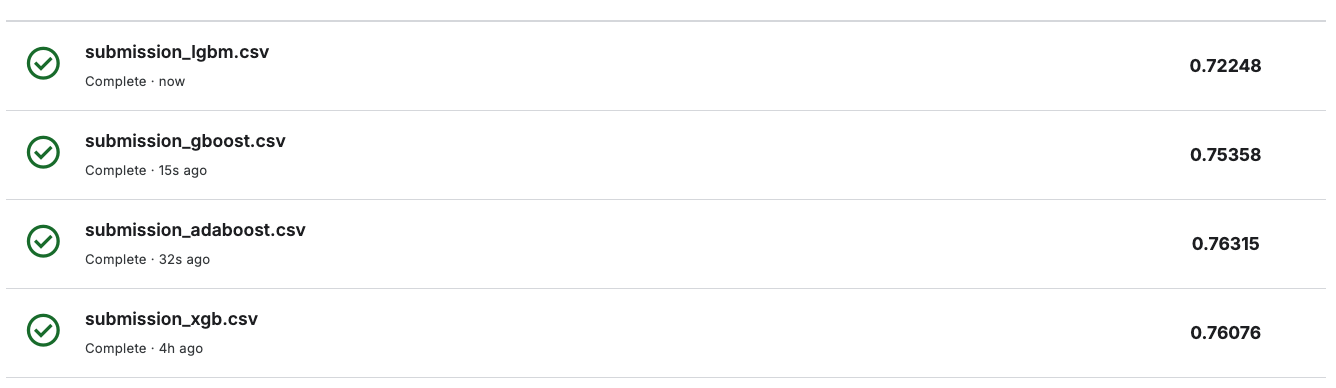